$$ \frac{d f}{d x} = 2 \pi\cos{[2\pi x]}, \quad f(0)=0.5. $$

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import torch
import torch.nn as nn

In [2]:
def samples(batch_size=100, n_inputs=1):     
    return torch.rand((batch_size, n_inputs))

In [3]:
mlp = nn.Sequential(
	nn.Linear(1, 8),
  	nn.Tanh(),
	nn.Linear(8, 4), 
	nn.Tanh(), 
	nn.Linear(4, 1)
)

mlp

Sequential(
  (0): Linear(in_features=1, out_features=8, bias=True)
  (1): Tanh()
  (2): Linear(in_features=8, out_features=4, bias=True)
  (3): Tanh()
  (4): Linear(in_features=4, out_features=1, bias=True)
)

In [4]:
N_STEPS = 5000
BATCH_SIZE = 100

optimizer = torch.optim.Adam(mlp.parameters(), lr=0.02)
criterion = torch.nn.MSELoss()

hist = []
log_each = 50
for step in range(1, N_STEPS):

    X = samples(BATCH_SIZE, 1)
    X.requires_grad_(True)
    
    # pde loss
    f = mlp(X)
    df_dx, = torch.autograd.grad(f, X, grad_outputs = torch.ones_like(X),create_graph=True)
    pde_loss = criterion(df_dx, 2*torch.pi*torch.cos(2*torch.pi*X))

    # boundary condition loss
    boundary_loss = criterion(mlp(torch.tensor([0.]).reshape(1,1)), torch.tensor([0.5]).reshape(1,1)) 
    
    # update
    optimizer.zero_grad()
    loss = pde_loss + boundary_loss
    loss.backward()
    optimizer.step()
   
    hist.append(loss.item())
    if step % log_each == 0:
        print(f'{step}/{N_STEPS} pde_loss {pde_loss.item():.5f} boundary_loss {boundary_loss.item():.5f}')

50/5000 pde_loss 8.01134 boundary_loss 0.00270
100/5000 pde_loss 6.90775 boundary_loss 0.00068
150/5000 pde_loss 0.35247 boundary_loss 0.08644
200/5000 pde_loss 0.00531 boundary_loss 0.00058
250/5000 pde_loss 0.00159 boundary_loss 0.00000
300/5000 pde_loss 0.00165 boundary_loss 0.00001
350/5000 pde_loss 0.00231 boundary_loss 0.00000
400/5000 pde_loss 0.00177 boundary_loss 0.00001
450/5000 pde_loss 0.00138 boundary_loss 0.00000
500/5000 pde_loss 0.00144 boundary_loss 0.00002
550/5000 pde_loss 0.00111 boundary_loss 0.00002
600/5000 pde_loss 0.00177 boundary_loss 0.00001
650/5000 pde_loss 0.00169 boundary_loss 0.00001
700/5000 pde_loss 0.00281 boundary_loss 0.00002
750/5000 pde_loss 0.00172 boundary_loss 0.00007
800/5000 pde_loss 0.00199 boundary_loss 0.00008
850/5000 pde_loss 0.00489 boundary_loss 0.00009
900/5000 pde_loss 0.00206 boundary_loss 0.00006
950/5000 pde_loss 0.00180 boundary_loss 0.00001
1000/5000 pde_loss 0.00108 boundary_loss 0.00002
1050/5000 pde_loss 0.00571 boundary_loss

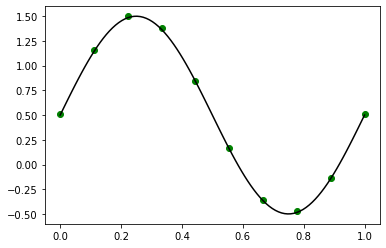

In [5]:
y= mlp(torch.linspace(0,1,10).reshape(-1,1)).detach().numpy().reshape(-1)
plt.scatter(np.linspace(0,1,10), y , c='green')
# actual solution
plt.plot(np.linspace(0,1,100), np.sin(2 * np.pi * np.linspace(0,1,100)) + 0.5, c='black')